<a href="https://colab.research.google.com/github/pankajyadav01/Text-Generation-using-TensorFlow-RNN-LSTM-/blob/main/Text_Generation_using_TF.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
# Code Block 1
import numpy as np 
import matplotlib.pyplot as plt
from tensorflow.keras.models import Sequential
from tensorflow.keras.utils import to_categorical 
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences
from tensorflow.keras.layers import Embedding, LSTM, Dense, Bidirectional


In [2]:
# Code Block 2
# sonnets.txt
!gdown --id 108jAePKK4R3BVYBbYJZ32JWUwxeMg20K  # downloads a file from Google Drive using the file ID

/usr/local/lib/python3.9/dist-packages/gdown/cli.py:121: FutureWarning: Option `--id` was deprecated in version 4.3.1 and will be removed in 5.0. You don't need to pass it anymore to use a file ID.
  warnings.warn(
Downloading...
From: https://drive.google.com/uc?id=108jAePKK4R3BVYBbYJZ32JWUwxeMg20K
To: /content/sonnets.txt
100% 93.6k/93.6k [00:00<00:00, 7.22MB/s]


In [3]:
# Code Block 3
# Define path for file with sonnets
SONNETS_FILE = './sonnets.txt'

# Read the data
with open('./sonnets.txt') as f:
    data = f.read()

# Convert to lower case and save as a list
corpus = data.lower().split("\n")

print(f"There are {len(corpus)} lines of sonnets\n")

print(f"The first 5 lines look like this:\n")
for i in range(5): # Loop through the first 5 lines of the corpus
  print(corpus[i])

There are 2159 lines of sonnets

The first 5 lines look like this:

from fairest creatures we desire increase,
that thereby beauty's rose might never die,
but as the riper should by time decease,
his tender heir might bear his memory:
but thou, contracted to thine own bright eyes,


In [4]:
# Code Block 4
# Create an instance of the Keras Tokenizer class
tokenizer = Tokenizer()

# Fit the tokenizer on the sonnets in the 'corpus' list
tokenizer.fit_on_texts(corpus)

# Get the total number of unique words in the sonnets, including a padding token
total_words = len(tokenizer.word_index) + 1

In [5]:
# Code Block 5
# Eetrieving the first line of the sonnets in the corpus list.
corpus[0]

'from fairest creatures we desire increase,'

In [6]:
# Code Block 6
# Convert the first line of the sonnets to a sequence of integer indices using the Tokenizer
tokenizer.texts_to_sequences(corpus[0])

[[],
 [],
 [58],
 [],
 [],
 [],
 [17],
 [6],
 [],
 [],
 [],
 [],
 [],
 [],
 [],
 [],
 [17],
 [],
 [],
 [],
 [],
 [],
 [],
 [],
 [],
 [],
 [],
 [],
 [],
 [6],
 [],
 [],
 [],
 [6],
 [],
 [],
 [],
 [],
 [17],
 [],
 [],
 []]

In [7]:
# Code Block 7
# Convert the first line of the sonnets to a sequence of integer indices using the Tokenizer
tokenizer.texts_to_sequences([corpus[0]])

[[34, 417, 877, 166, 213, 517]]

In [8]:
# Code Block 8
# Extract the resulting 1st sequence
tokenizer.texts_to_sequences([corpus[0]])[0]

[34, 417, 877, 166, 213, 517]

## Generating n_grams


In [9]:
# Code Block 9
# Define a function to generate n-gram sequences from a corpus of text using a Tokenizer
def n_gram_seqs(corpus, tokenizer):
    """
    Generates a list of n-gram sequences
    
    Args:
        corpus (list of string): lines of texts to generate n-grams for
        tokenizer (object): an instance of the Tokenizer class containing the word-index dictionary
    
    Returns:
        input_sequences (list of int): the n-gram sequences for each line in the corpus
    """
    # Initialize an empty list to store the n-gram sequences
    input_sequences = []
    
    # Iterate over each line in the corpus
    for line in corpus:
        # Convert the line to a sequence of integer indices using the Tokenizer
        token_list = tokenizer.texts_to_sequences([line])[0]

        # Iterate over each index in the sequence, creating an n-gram sequence for each index
        for i in range(1, len(token_list)):
            n_gram_sequence = token_list[:i+1]

            # Append the n-gram sequence to the list of input sequences
            input_sequences.append(n_gram_sequence)
    

    # Return the list of n-gram sequences
    return input_sequences

In [10]:
# Code Block 10
# Test 
first_example_sequence = n_gram_seqs([corpus[0]], tokenizer)

print("n_gram sequences for first example look like this:\n")
first_example_sequence

n_gram sequences for first example look like this:



[[34, 417],
 [34, 417, 877],
 [34, 417, 877, 166],
 [34, 417, 877, 166, 213],
 [34, 417, 877, 166, 213, 517]]

In [11]:
# Code Block 11
# Test 
next_3_examples_sequence = n_gram_seqs(corpus[1:4], tokenizer)

print("n_gram sequences for next 3 examples look like this:\n")
next_3_examples_sequence

n_gram sequences for next 3 examples look like this:



[[8, 878],
 [8, 878, 134],
 [8, 878, 134, 351],
 [8, 878, 134, 351, 102],
 [8, 878, 134, 351, 102, 156],
 [8, 878, 134, 351, 102, 156, 199],
 [16, 22],
 [16, 22, 2],
 [16, 22, 2, 879],
 [16, 22, 2, 879, 61],
 [16, 22, 2, 879, 61, 30],
 [16, 22, 2, 879, 61, 30, 48],
 [16, 22, 2, 879, 61, 30, 48, 634],
 [25, 311],
 [25, 311, 635],
 [25, 311, 635, 102],
 [25, 311, 635, 102, 200],
 [25, 311, 635, 102, 200, 25],
 [25, 311, 635, 102, 200, 25, 278]]

Apply the `n_gram_seqs` transformation to the whole corpus and save the maximum sequence length to use it later:

In [12]:
# Code Block 12
#Apply the n_gram_seqs transformation to the whole corpus
input_sequences = n_gram_seqs(corpus, tokenizer)

# Save max length 
max_sequence_len = max([len(x) for x in input_sequences])

print(f"n_grams of input_sequences have length: {len(input_sequences)}")
print(f"maximum length of sequences is: {max_sequence_len}")

n_grams of input_sequences have length: 15462
maximum length of sequences is: 11


## Add padding to the sequences



In [13]:
# Code Block 13
def pad_seqs(input_sequences, maxlen):
    """
    Pads tokenized sequences to the same length
    
    Args:
        input_sequences (list of int): tokenized sequences to pad
        maxlen (int): maximum length of the token sequences
    
    Returns:
        padded_sequences (array of int): tokenized sequences padded to the same length
    """

    # Pad sequences with zeros to the same length
    padded_sequences = np.array(pad_sequences(input_sequences, maxlen=max_sequence_len, padding='pre'))
    
    # Return the padded sequences
    return padded_sequences


In [14]:
# Code Block 14
# Test your function with the n_grams_seq of the first example
first_padded_seq = pad_seqs(first_example_sequence, max([len(x) for x in first_example_sequence]))
first_padded_seq

array([[  0,   0,   0,   0,   0,   0,   0,   0,   0,  34, 417],
       [  0,   0,   0,   0,   0,   0,   0,   0,  34, 417, 877],
       [  0,   0,   0,   0,   0,   0,   0,  34, 417, 877, 166],
       [  0,   0,   0,   0,   0,   0,  34, 417, 877, 166, 213],
       [  0,   0,   0,   0,   0,  34, 417, 877, 166, 213, 517]],
      dtype=int32)

In [15]:
# Code Block 15
# Test your function with the n_grams_seq of the next 3 examples
next_3_padded_seq = pad_seqs(next_3_examples_sequence, max([len(s) for s in next_3_examples_sequence]))
next_3_padded_seq

array([[  0,   0,   0,   0,   0,   0,   0,   0,   0,   8, 878],
       [  0,   0,   0,   0,   0,   0,   0,   0,   8, 878, 134],
       [  0,   0,   0,   0,   0,   0,   0,   8, 878, 134, 351],
       [  0,   0,   0,   0,   0,   0,   8, 878, 134, 351, 102],
       [  0,   0,   0,   0,   0,   8, 878, 134, 351, 102, 156],
       [  0,   0,   0,   0,   8, 878, 134, 351, 102, 156, 199],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,  16,  22],
       [  0,   0,   0,   0,   0,   0,   0,   0,  16,  22,   2],
       [  0,   0,   0,   0,   0,   0,   0,  16,  22,   2, 879],
       [  0,   0,   0,   0,   0,   0,  16,  22,   2, 879,  61],
       [  0,   0,   0,   0,   0,  16,  22,   2, 879,  61,  30],
       [  0,   0,   0,   0,  16,  22,   2, 879,  61,  30,  48],
       [  0,   0,   0,  16,  22,   2, 879,  61,  30,  48, 634],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,  25, 311],
       [  0,   0,   0,   0,   0,   0,   0,   0,  25, 311, 635],
       [  0,   0,   0,   0,   0,   0,   

In [16]:
# Code Block 16
# Pad the whole corpus
input_sequences = pad_seqs(input_sequences, max_sequence_len)

print(f"padded corpus has shape: {input_sequences.shape}")

padded corpus has shape: (15462, 11)


## Split the data into features and labels



In [17]:
# Code Block 17
def features_and_labels(input_sequences, total_words):
    """
    Generates features and labels from n-grams
    
    Args:
        input_sequences (list of int): sequences to split features and labels from
        total_words (int): vocabulary size
    
    Returns:
        features, one_hot_labels (array of int, array of int): arrays of features and one-hot encoded labels
    """

    # Extract the n-gram sequences as features
    features = np.array([sequence[:-1] for sequence in input_sequences])

    # Extract the last token of each n-gram sequence as the label
    labels = np.array([sequence[-1] for sequence in input_sequences])

    # One-hot encode the labels
    one_hot_labels = np.array(to_categorical(labels, num_classes = total_words))

    # Return the features and the Encoded Lables
    return features, one_hot_labels

In [18]:
# Code Block 18
# Test 
first_features, first_labels = features_and_labels(first_padded_seq, total_words)

print(f"labels have shape: {first_labels.shape}")
print("\nfeatures look like this:\n")
first_features

labels have shape: (5, 3211)

features look like this:



array([[  0,   0,   0,   0,   0,   0,   0,   0,   0,  34],
       [  0,   0,   0,   0,   0,   0,   0,   0,  34, 417],
       [  0,   0,   0,   0,   0,   0,   0,  34, 417, 877],
       [  0,   0,   0,   0,   0,   0,  34, 417, 877, 166],
       [  0,   0,   0,   0,   0,  34, 417, 877, 166, 213]], dtype=int32)

In [19]:
# Code Block 19
# Split the whole corpus
features, labels = features_and_labels(input_sequences, total_words)

print(f"features have shape: {features.shape}")
print(f"labels have shape: {labels.shape}")

features have shape: (15462, 10)
labels have shape: (15462, 3211)


## Create the model


In [20]:
# Code Block 20
def create_model(total_words, max_sequence_len):
    """
    Creates a text generator model
    
    Args:
        total_words (int): size of the vocabulary for the Embedding layer input
        max_sequence_len (int): length of the input sequences
    
    Returns:
        model (tf.keras Model): the text generator model
    """
    # Define a Sequential model
    model = Sequential()

    # Add an Embedding layer with input length of max_sequence_len - 1
    model.add(Embedding(total_words, 100, input_length= max_sequence_len-1)),

    # Add a Bidirectional LSTM layer with 150 units
    model.add(Bidirectional(LSTM(150))),

    # Add a Dense output layer with softmax activation function
    model.add(Dense(total_words, activation='softmax'))


    # Compile the model
    model.compile(loss='categorical_crossentropy',
                  optimizer='adam',
                  metrics=['accuracy'])
    


    return model

In [21]:
# Code Block 21
# Get the untrained model
model = create_model(total_words, max_sequence_len)

# Train the model
history = model.fit(features, labels, epochs=50, verbose=1)

Epoch 1/50
484/484 [==============================] - 30s 31ms/step - loss: 6.8942 - accuracy: 0.0215
Epoch 2/50
484/484 [==============================] - 6s 13ms/step - loss: 6.4360 - accuracy: 0.0322
Epoch 3/50
484/484 [==============================] - 4s 8ms/step - loss: 6.1945 - accuracy: 0.0420
Epoch 4/50
484/484 [==============================] - 5s 10ms/step - loss: 5.9173 - accuracy: 0.0534
Epoch 5/50
484/484 [==============================] - 4s 9ms/step - loss: 5.6089 - accuracy: 0.0646
Epoch 6/50
484/484 [==============================] - 4s 9ms/step - loss: 5.2603 - accuracy: 0.0770
Epoch 7/50
484/484 [==============================] - 5s 11ms/step - loss: 4.8708 - accuracy: 0.0958
Epoch 8/50
484/484 [==============================] - 4s 9ms/step - loss: 4.4538 - accuracy: 0.1314
Epoch 9/50
484/484 [==============================] - 4s 8ms/step - loss: 4.0347 - accuracy: 0.1826
Epoch 10/50
484/484 [==============================] - 4s 9ms/step - loss: 3.6235 - accuracy: 0

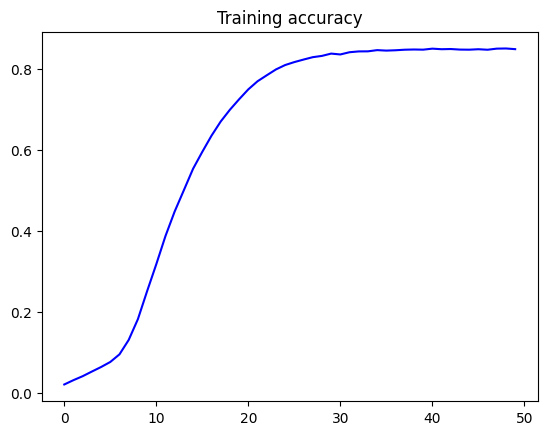

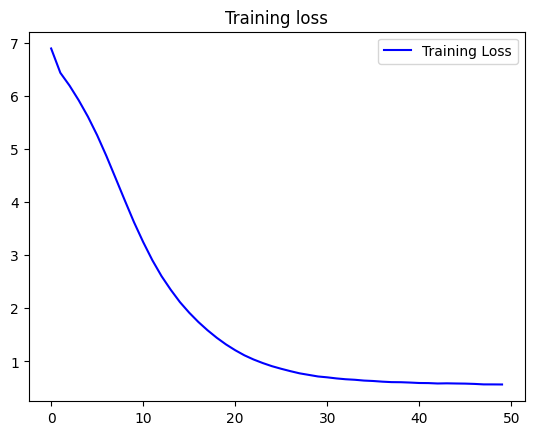

In [22]:
# Code Block 22
# Take a look at the training curves of model

acc = history.history['accuracy']
loss = history.history['loss']

epochs = range(len(acc))

plt.plot(epochs, acc, 'b', label='Training accuracy')
plt.title('Training accuracy')

plt.figure()

plt.plot(epochs, loss, 'b', label='Training Loss')
plt.title('Training loss')
plt.legend()

plt.show()

## See the model in action



In [23]:
# Code Block 23
seed_text = "Love yourself a little more"
next_words = 100
  
for _ in range(next_words):
	# Convert the text into sequences
	token_list = tokenizer.texts_to_sequences([seed_text])[0]
	# Pad the sequences
	token_list = pad_sequences([token_list], maxlen=max_sequence_len-1, padding='pre')
	# Get the probabilities of predicting a word
	predicted = model.predict(token_list, verbose=0)
	# Choose the next word based on the maximum probability
	predicted = np.argmax(predicted, axis=-1).item()
	# Get the actual word from the word index
	output_word = tokenizer.index_word[predicted]
	# Append to the current text
	seed_text += " " + output_word

print(seed_text)

Love yourself a little more than no cruel bear new own slavery nymphs times cheeks own own will in their skill hand defaced open wide part new and worth defendant that knows well due new and in behold one right best parts so long thine eyes in me one date new new faith pluck me is seen the spring of day date new new friend shall in my verse doth lie with me young to thee alone is writ is new new rhyme and hate her thee is new verse left forth me bright can see again alone can find thee now they should sing
